# Chapter 9 Image Segmentation

In [1]:
import util.nbutil
from util.imutil import *

%matplotlib inline

importing Jupyter notebook from /home/nbuser/library/util/imutil.ipynb


In [2]:
def matplot(img, title=None, cmap=None, figsize=None):
    col = len(img)
    
    if figsize is None:
        plt.figure(figsize=(col * 4, col * 4))
    else:
        plt.figure(figsize=figsize)
        
    for i, j in enumerate(img):
        plt.subplot(1, col, i + 1)
        plt.axis("off")
        
        if title != None:
            plt.title(title[i])
        if cmap != None and cmap[i] != "":
            plt.imshow(j, cmap=cmap[i])
        else:
            imshow(j)

## 9.2 Thresholding

### Single Thresholding

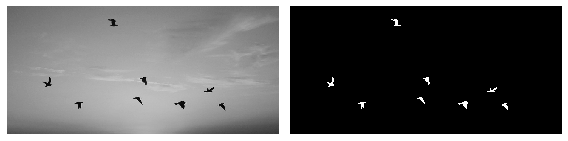

In [3]:
f = imread("flying.png")
matplot([f, f < 50], cmap=["", "gray"])

In [4]:
(f < 50).dtype

dtype('bool')

In [5]:
(f < 50).astype(float64).dtype

dtype('float64')

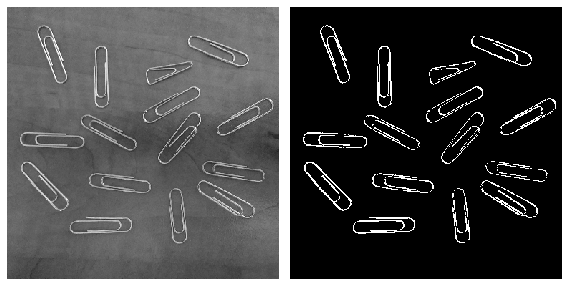

In [6]:
p = imread("paperclips.png")
matplot([p, p > 140])

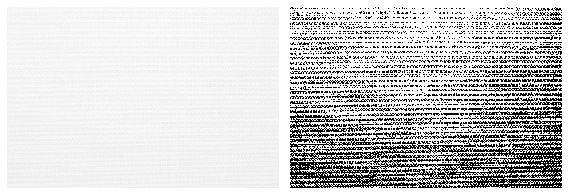

In [7]:
h = imread("handmade.png")
matplot([h, h > 242])

### Double Thresholding

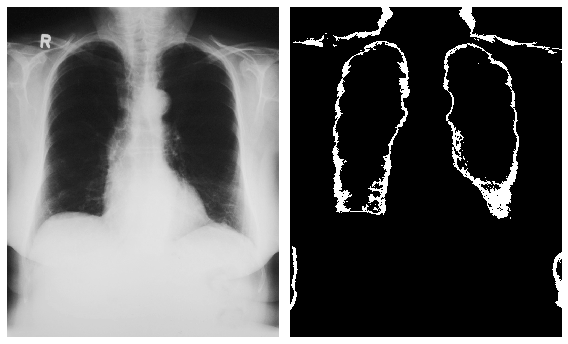

In [8]:
x = img_as_ubyte(rgb2gray(imread("xray.png")))
matplot([x, (x > 50) & (x < 80)])

## 9.4 Choosing an Appropriate Threshold Value

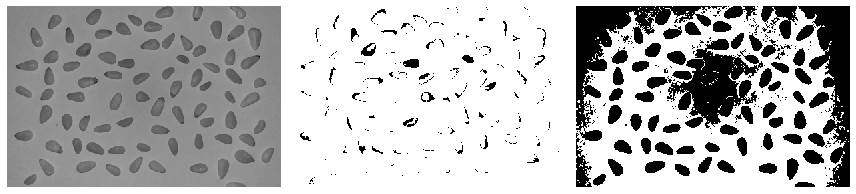

In [9]:
n = imread("pinenuts.png")
matplot([n, n > 90, n > 140])

### The ISODATA Method

```
scipy.ndimage.histogram(input, min, max, bins, labels=None, index=None)

input : array_like
    Data for which to calculate histogram.

min, max : int
    Minimum and maximum values of range of histogram bins.

bins : int
    Number of bins.
```

In [10]:
c = imread("cameraman.png")
k = arange(256)
n = ndi.histogram(c, 0, 255, 256)
p = n / c.size
wb = np.cumsum(p)
wf = 1 - wb
kpc = np.cumsum(k * p)
mu_b = kpc / wb
mu_f = (kpc[-1] - kpc) / wf

In [11]:
t = 128
for i in range(10):
    t1 = int((mu_f[t] + mu_b[t]) / 2)
    print(t1)
    t = t1

108
95
90
88
88
88
88
88
88
88


In [12]:
b = imread("blood.png")
p = imread("paramecium1.png")
n = imread("pinenuts.png")
d = imread("daisies.png")

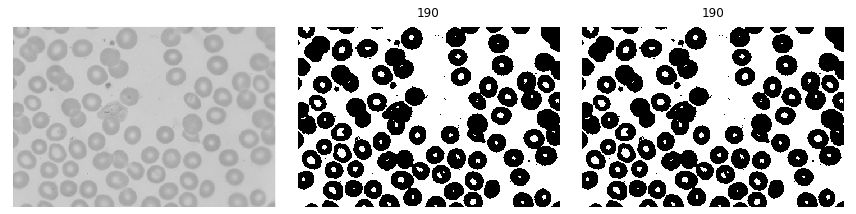

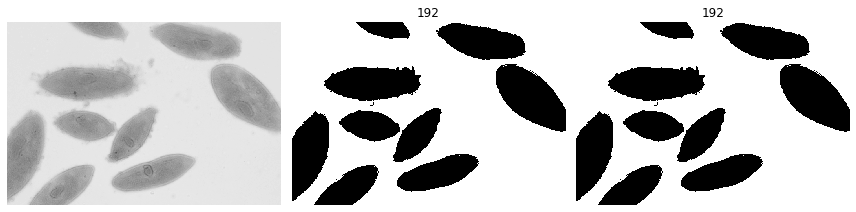

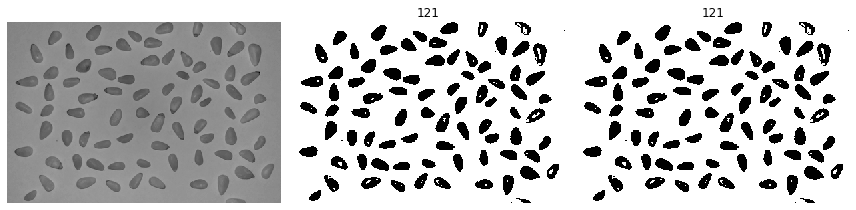

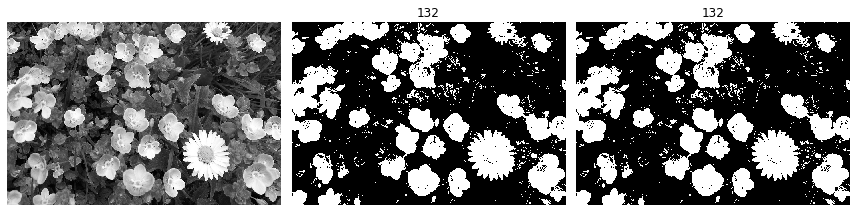

In [13]:
for i in [b, p, n, d]:
    otsu = threshold_otsu(i)
    isodata = threshold_isodata(i)
    matplot([i, i > otsu, i > isodata], ["", otsu, isodata])

## 9.5 Adaptive Thresholding

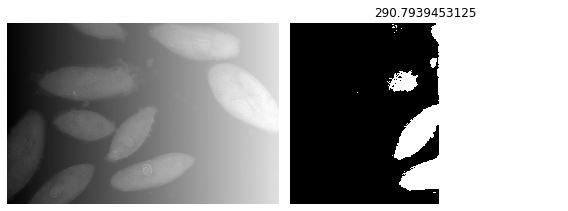

In [14]:
r, c = p.shape
x, y = np.mgrid[0:r, 0:c]
p2 = 255 - p + y / 2
t = threshold_otsu(p2)
matplot([p2, p2 > t], title=["", t], cmap=["gray", ""])

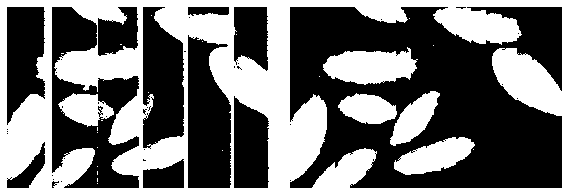

In [15]:
matplot([threshold_adaptive(p2, 6), threshold_adaptive(p2, 18)])

## 9.7 Derivatives and Edges

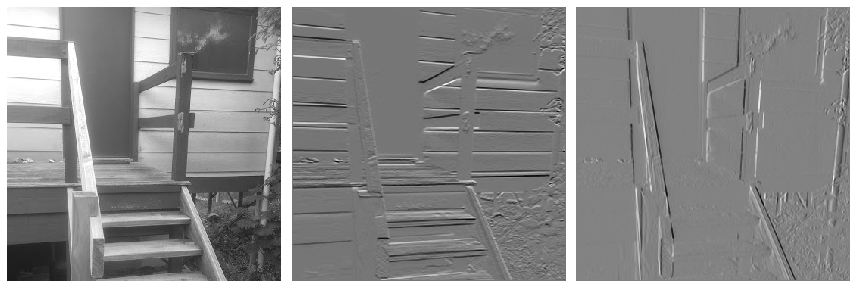

In [16]:
s = imread("stairs.png")
sx = prewitt_h(s)
sy = prewitt_v(s)
matplot([s, sx, sy], cmap=["", "gray", "gray"])

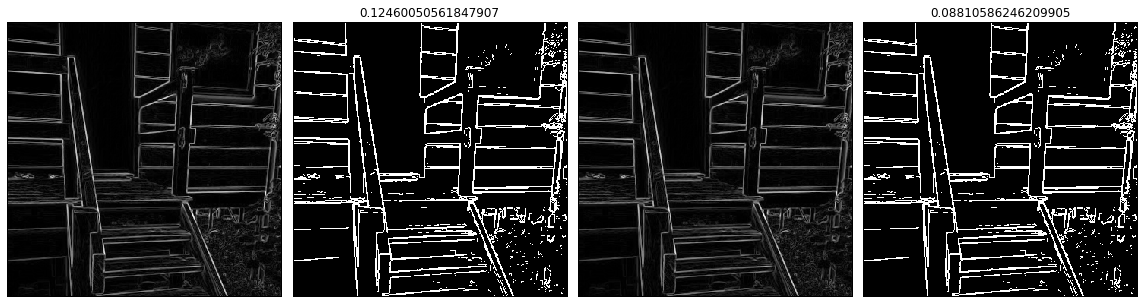

In [17]:
edge_p = np.sqrt(sx**2 + sy**2)
t = threshold_otsu(edge_p)
edge_p2 = prewitt(s)
t2 = threshold_otsu(edge_p2)
matplot([edge_p, edge_p > t, edge_p2, edge_p2 > t2], ["", t, "", t2], cmap=["gray", "", "gray", ""])

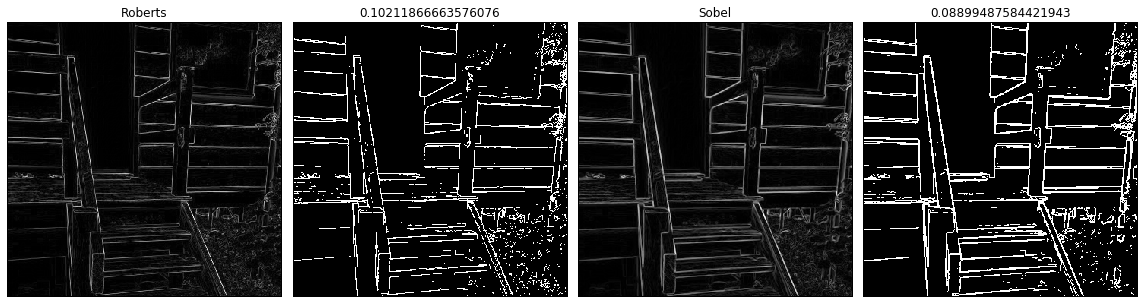

In [18]:
edge_r = roberts(s)
t = threshold_otsu(edge_r)
edge_s = sobel(s)
t2 = threshold_otsu(edge_s)
matplot([edge_r, edge_r > t, edge_s, edge_s > t2], ["Roberts", t, "Sobel", t2], ["gray", "", "gray", ""])

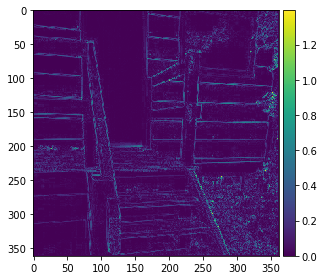

In [19]:
s2 = img_as_float(s)
s_lap = abs(fl.laplace(s2))
imshow(s_lap)

In [20]:
sz = zerocross(laplace(float64(s)))
plt.imshow(sz, cmap="gray")

NameError: name 'zerocross' is not defined

In [ ]:
#s = rgb2gray(io.imread("zebras.jpg"))
marr = marr_hildreth(s, 1)
#t = threshold_otsu(marr)
matplot([marr])
matplot([marr_hildreth(s, 1)])
matplot([marr_hildreth(s, 2)])
matplot([marr_hildreth(s, 3)])
matplot([marr_hildreth(s, 4)])
matplot([marr_hildreth(s, 5)])
matplot([marr_hildreth(s, 6)])
matplot([marr_hildreth(s, 7)])
matplot([marr_hildreth(s, 8)])
matplot([marr_hildreth(s, 9)])
matplot([marr_hildreth(s, 10)])
#matplot([marr, marr > t], ["", t], cmap=["gray", ""])

In [ ]:
def zc_cond1(img, i, j):
    return (img[i][j] < 0) and (img[i - 1][j] > 0 or img[i + 1][j] > 0 or img[i][j - 1] > 0 or img[i][j + 1] > 0)

def zc_cond2(img, i, j):
    return (img[i][j] == 0) and (img[i - 1][j] * img[i + 1][j] < 0 or img[i][j - 1] * img[i][j + 1] < 0)

def zerocross(img):
    r, c = img.shape
    z = np.zeros_like(img)
    for i in range(1, r - 1):
        for j in range(1, c - 1):
            if zc_cond1(img, i, j) or zc_cond2(img, i, j):
                z[i][j] = 1
    return z

def marr_hildreth(img, sigma):
    log = gaussian_laplace(float64(img), sigma=sigma)
    return zerocross(log)

In [ ]:
s3 = img_as_float(s2)
a = zeros((13, 13))
mid = int((13 - 1) / 2)
a[mid, mid] = 1

g = gaussian_filter(a, sigma=2)
z = zerocross(laplace(correlate(s3, g)))
#imshow(zero_crossing(laplace(correlate(s3, g))), cmap="gray")
threshold_otsu(z), z.min(), z.max()
matplot([marr_hildreth(s2, 13, 2)])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')



plt.show()

In [ ]:
plt.imshow(edge_sobel, "gray")